# Introduction

The aim of this project is to implement a machine learning model using the k-nearest neighbours algorithm to predict a car's market price given its attributes. This project was completed at the end of an [Introduction to Machine Learning](https://www.dataquest.io/course/machine-learning-fundamentals/) course on Dataquest.io.

The dataset that will be used for this project contains technical information for each car as well as the price of each car. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile) and the dataset can be downloaded directly by clicking [this](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) link

# Import and preview dataset
Lets begin by importing the required libraries and then reading the csv file in to a variable called "cars"

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv('imports-85.data')
#Preview first 5 rows
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The titles of each column in the dataset above are not consistent with the column names indicated on the [information page](https://archive.ics.uci.edu/ml/datasets/automobile) for this dataset. The column titles in the dataset above cannot be interpreted as they are, so let's change the names of the columns to match those given in the information page.

In [3]:
#Update column titles using list of corrected names)
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = cols)

#Change display settings to ensure no columns are hidden when printed
pd.options.display.max_columns = 99
#Preview dataset to check column names
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Handle missing / incorrect information
---
### Incorrect values
Predictive modelling is difficult and sometimes impossible if there are missing values in the data. The preview above shows that there is some missing information in this dataset because the "normalized-losses" column contains '?' characters as its first 3 entries.

Let's change any incorrect values to NaN. To identify which columns contain missing/incorrect information, we can check the data type of each column. A column will only be registered as containing float data if all values in the column are integers/float values. If any other data type is present in the column, pandas will register the column as an 'object' data type.

The columns that should contain numerical, continuous values are then isolated into a new dataframe for cleaning and conversion to the float data type




Find missing values in numeric columns and rescale all values in numeric columns from 0 to 1

In [4]:
#Check data types of each collumn 

#Columns containing numerical values that are listed as 
#object type will have '?' or other text in them
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
#Select only columns with numerical, continuous values and assign to new DataFrame
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 
                   'width', 'height', 'curb-weight', 'bore', 'stroke', 
                   'compression-rate', 'horsepower', 'peak-rpm', 
                   'city-mpg', 'highway-mpg', 'price']

cars_numeric = cars[continuous_cols]

#Replace all '?' characters with NaN
cars_numeric = cars_numeric.replace('?',np.nan)

### Convert columns to float datatype
The columns in cars_numeric should now contain only numerical values. This means the .astype function can be used without error to convert the columns to the float datatype

In [6]:
#Convert all numeric columns that contained '?' from object to float type
cars_numeric = cars_numeric.astype('float')

#Print data types to confirm changes
cars_numeric.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [7]:
#Check current status of numerical dataframe
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# Missing information
Now that all values in the cars_numeric dataset are of the correct data type, let's find number of missing values in all columns. All missing info was replaced by NaN, so we can now check for missing data by counting the number of null values.

In [8]:
#Check number of null values 
cars_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There are 41 values missing in the normlized-losses column which is a significant amount considering there are only 205 rows in the dataset. This column does not seem to be particularly useful for predicting the sale price of a car anyway, so we won't use it in this analysis. The column can therefore be removed from the dataframe.

There aren't many other many rows containing missing information. Less than 2% of the rows contain missing information, so I feel confident that those rows can be dropped without having any significant impact on the results. With such a small percentage of information missing, this seems like a better option that using imputation to create data.

The price column has 4 rows without data and this is of critical importance since we want to predict the sale price of a vehicle. Let's check if any other data is missing in the rows without a price:

In [9]:
#Remove normalized-losses
cars_numeric = cars_numeric.drop('normalized-losses', axis = 1)
#Print rows with missing price information
cars_numeric[cars_numeric['price'].isnull()]

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,99.5,178.2,67.9,52.0,3053.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
44,94.5,155.9,63.6,52.0,1874.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
45,94.5,155.9,63.6,52.0,1909.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
129,98.4,175.7,72.3,50.5,3366.0,3.94,3.11,10.0,288.0,5750.0,17.0,28.0,NaN


Unfortunately, the only other column missing information where there is no price information is the normalized-losses column which we have chosen to ignore anyway. This means no other information will be removed if the price column is dropped.

Since our machine learning model will be trained on the price column, we should definitely not be creating any information in that column, so let's drop the 4 rows that don't have prices.

When we only want to drop missing values from selected columns, we need to use the 'subset' parameter of the DataFrame.dropna method. Details on this method can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [10]:
cars_numeric = cars_numeric.dropna(subset = ['price'])

#Check remaining number of rows left after removing null prices. 
#This should be 201 since we removed 4 null prices from the 205 rows
print("Rows in dataset: ",len(cars_numeric))

#Check missing values to be sure the rows with missing prices have been removed
cars_numeric.isnull().sum()

Rows in dataset:  201


wheel-base          0
length              0
width               0
height              0
curb-weight         0
bore                4
stroke              4
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               0
dtype: int64

### Fill missing values
To avoid losing all information in the rows that contain certain missing values, the missing values will be replaced with the column mean

In [11]:
# Replace missing values using column means.
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

In [12]:
# Confirm that there are no more missing values!
print(cars_numeric.isnull().sum())

wheel-base          0
length              0
width               0
height              0
curb-weight         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64


After cleadning the dataset there are 205 rows in the dataset no information is missing in any of the rows.

# Normalization

At this stage, all every column contains values of different unites. To make comparisons of these values on the same scale, the data must be normalized to a scale between 0 and 1.

In the cell below, all numeric columns other than price are normalized and assigned to a new dataset called "normalized". Assigning the normalized dataframe to a new variable allows us to keep the cleaned dataset in tact in case we want/need to refer back to it in future

In [13]:
normalized = (cars_numeric - cars_numeric.min()) / (
    cars_numeric.max() - cars_numeric.min())
normalized['price'] = cars_numeric['price']
normalized.head()

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# K-Nearest Neighbours
---
The dataframe is now ready for the machine learning model. This will be done in increasing complexity, starting with a univariate model to practise the workflow using a simpler scenario

## Univariate Model
The KNeighboursRegressor predicts the target values by learning based on the k nearest neighbours of each query point. The code block below trains the model to predict price based on only one column at a time. The resulting root mean square error for the predictions made using each of those columns is then calculated and assigned to a dictionary with the key being the column that was used to train the model

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#KNearestNeighbours function using default number of neigbhbours (5):
def knn_train_test(df,train_col,target_col):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #Randomize dataset 
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    train_set_end = int(len(random_df) / 2)

    #Split dataset into train and test sets
    train_df = random_df.iloc[0:train_set_end]
    test_df = random_df.iloc[train_set_end:]
    
    #Train using training column and test column sent to function
    knn.fit(train_df[[train_col]],train_df[target_col])
    
    #Predict using trained model
    predictions = knn.predict(test_df[[train_col]])
    
    #Calculate RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    
    return rmse
                   
    
rmse_values = {}
train_cols = normalized.columns.drop('price')

# For each column in train_cols, train a model, return the RMSE value and add 
#to the dictionary "rmse_results".
for col in train_cols:
    rmse = knn_train_test(normalized, col, 'price')
    rmse_values[col] = rmse
    
rmse_values

{'wheel-base': 5461.553997873057,
 'length': 5427.2009608367125,
 'width': 4704.482589704386,
 'height': 8144.441042663747,
 'curb-weight': 4401.118254793124,
 'bore': 6780.627784685976,
 'stroke': 8006.529544647101,
 'compression-rate': 6610.812153159129,
 'horsepower': 4037.0377131537603,
 'peak-rpm': 7697.4596964334805,
 'city-mpg': 4766.422505090134,
 'highway-mpg': 4630.026798588056}

The dictionary above is hard to read/interpret. The readability can be improved if we create a sorted series object 

In [15]:
rmse_values_series = pd.Series(rmse_values)
rmse_values_series.sort_values()

horsepower          4037.037713
curb-weight         4401.118255
highway-mpg         4630.026799
width               4704.482590
city-mpg            4766.422505
length              5427.200961
wheel-base          5461.553998
compression-rate    6610.812153
bore                6780.627785
peak-rpm            7697.459696
stroke              8006.529545
height              8144.441043
dtype: float64

The code sequence above is repeated below with one small difference: The code runs for k values of 1, 3, 5, 7 and 9 instead of just the default value of 5.

In [16]:
#KNearestNeighbours function using specified number of neigbhbours:
def knn_train_test(df,train_col,target_col):
    np.random.seed(1)
    
    #Randomize dataset 
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    train_set_end = int(len(random_df) / 2)

    #Split dataset into train and test sets
    train_df = random_df.iloc[0:train_set_end]
    test_df = random_df.iloc[train_set_end:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    #Calculate RMSE for each k
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        #Train using training column and test column sent to function
        knn.fit(train_df[[train_col]],train_df[target_col])
        
        #Predict using trained model
        predictions = knn.predict(test_df[[train_col]])
    
        #Calculate RMSE for current k value
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(0.5)
    
        k_rmses[k] = rmse
        
    return k_rmses
    
k_rmse_values = {}
train_cols = train_cols = normalized.columns.drop('price')

# For each column in train_cols, train a model, return the RMSE value and add 
#to the dictionary "rmse_results".
for col in train_cols:
    k_rmse = knn_train_test(normalized, col, 'price')
    k_rmse_values[col] = k_rmse

k_rmse_values

{'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006.529544647101,
  7: 7803.937796804327,
  9: 7735.554366079291},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.8

Once again, the values in these dictionaries are hard to interpret in text form. Let's use line charts to visualize the results

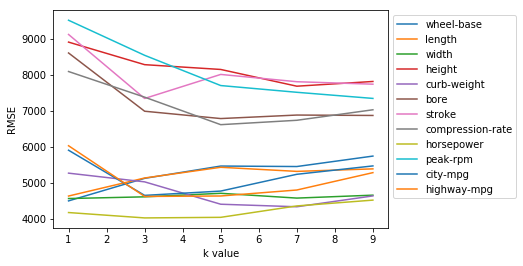

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

#List for legend
leg = []

#Plot rmse for each k value for models trained on each column
for k,v in k_rmse_values.items():
#     print("key: ",k)
#     print("values: ",v)
    x = list(v.keys())
    y = list(v.values())
    leg.append(k)
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    
plt.legend(leg, bbox_to_anchor = (1,1))    
plt.show()

### Results of univariate model
The avg rmse values across different k values used in univariate models above is calculated in the following block. The values are then sorted in ascending order to identify which features were the best predictors of price using a univariate model.

In [18]:
#Compute avg RMSE value for different k values
feature_avg_rmse = {}
for k,v in k_rmse_values.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

In [19]:
#Display best features sorted avg RMSE values
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower          4219.377860
width               4618.910560
curb-weight         4730.075815
highway-mpg         5069.469256
length              5176.394904
city-mpg            5202.409003
wheel-base          5252.392462
compression-rate    7166.073599
bore                7222.472445
stroke              8000.240467
peak-rpm            8119.365233
height              8163.346266
dtype: float64

## Multivariate Model
A similar procedure to the one used above is implemented below for multivariate models. These models use between 2 and 6 of the best features to determine the optimum number of features to use.

To begin, the multivariate model runs with a k value of 5. The model is then updated to run with a range of between 1 and 25 neighbours

##### 5 Neighbours

In [20]:
#Multivariate KNearestNeighbours function

def knn_train_test_multi(df,train_cols,target_col):
    np.random.seed(1)
    
    #Randomize dataset 
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    train_set_end = int(len(random_df) / 2)

    #Split dataset into train and test sets
    train_df = random_df.iloc[0:train_set_end]
    test_df = random_df.iloc[train_set_end:]
    
    k_value = [5]
    k_rmses = {}
    
    #Calculate RMSE for each k
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        #Train using training column and test column sent to function
        knn.fit(train_df[train_cols],train_df[target_col])
        
        #Predict using trained model
        predictions = knn.predict(test_df[train_cols])
    
        #Calculate RMSE for current k value
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(0.5)
    
        k_rmses[str(k) + " Neighbours"] = rmse  
    return k_rmses
    
#Disctionary of RMSE values for each set of features and each number of neighbours
k_rmse_values = {}

two_best_features = ['horsepower', 'width']
rmse = knn_train_test_multi(normalized, two_best_features, 'price')
k_rmse_values["two best features"] = rmse

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse = knn_train_test_multi(normalized, three_best_features, 'price')
k_rmse_values["three best features"] = rmse

four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse = knn_train_test_multi(normalized, four_best_features, 'price')
k_rmse_values["four best features"] = rmse

five_best_features = ['horsepower', 'width', 'curb-weight', 
                      'highway-mpg', 'length']
rmse = knn_train_test_multi(normalized, five_best_features, 'price')
k_rmse_values["five best features"] = rmse

six_best_features = ['horsepower', 'width', 'curb-weight', 
                     'highway-mpg', 'length', 'city-mpg']
rmse = knn_train_test_multi(normalized, six_best_features, 'price')
k_rmse_values["six best features"] = rmse

k_rmse_values

{'two best features': {'5 Neighbours': 3589.3132622073304},
 'three best features': {'5 Neighbours': 3305.9401397969677},
 'four best features': {'5 Neighbours': 3358.6915801682458},
 'five best features': {'5 Neighbours': 3665.546673045813},
 'six best features': {'5 Neighbours': 3628.261188214127}}

##### 1-25 Neighbours

In [21]:
#Multivariate KNearestNeighbours function with multiple k values

def knn_train_test_multi(df,train_cols,target_col):
    np.random.seed(1)
    
    #Randomize dataset 
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    train_set_end = int(len(random_df) / 2)

    #Split dataset into train and test sets
    train_df = random_df.iloc[0:train_set_end]
    test_df = random_df.iloc[train_set_end:]
    
    k_value = [i for i in range(1,25)]
    k_rmses = {}
    
    #Calculate RMSE for each k
    for k in k_value:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        #Train using training column and test column sent to function
        knn.fit(train_df[train_cols],train_df[target_col])
        
        #Predict using trained model
        predictions = knn.predict(test_df[train_cols])
    
        #Calculate RMSE for current k value
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(0.5)
    
        k_rmses[k] = rmse
        
    return k_rmses
    
k_rmse_values = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse = knn_train_test_multi(normalized, three_best_features, 'price')
k_rmse_values["three best features"] = rmse

four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse = knn_train_test_multi(normalized, four_best_features, 'price')
k_rmse_values["four best features"] = rmse

five_best_features = ['horsepower', 'width', 'curb-weight', 
                      'highway-mpg', 'length']
rmse = knn_train_test_multi(normalized, five_best_features, 'price')
k_rmse_values["five best features"] = rmse

k_rmse_values

{'three best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868,
  16: 4394.4846551644205,
  17: 4510.399710057406,
  18: 4584.310961865486,
  19: 4636.62620477063,
  20: 4664.465847866811,
  21: 4724.096637428273,
  22: 4752.535484102914,
  23: 4808.703310452101,
  24: 4858.9452710176065},
 'four best features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.9

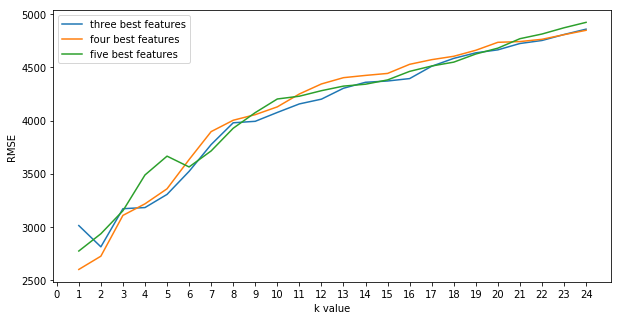

In [22]:
#List to be used for legend
leg = []
#Create figure object wide enough for easy viewing
ax = plt.figure(figsize = (10,5))
for k,v in k_rmse_values.items():
    x = list(v.keys())
    y = list(v.values())
    #Add current number of features to legend
    leg.append(k)
 
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.xticks(np.arange(0,25,1))
    
plt.legend(leg)
plt.show()

# Results of multivariate model
The multivariate model produced results with signifcantly lower RMSE values than the univariate model when used with the optimum number of neighbours. 

Using too many neighbours caused an increase in the RMSE value. This increase in RMSE is likely caused by underfitting because the distribution becomes 'smoothed out' when the k value is too large. More information about underfitting and overfitting using K-Nearest Neighbours can be found [here](https://shapeofdata.wordpress.com/2013/05/07/k-nearest-neighbors/).

# Conclusion
---
The K-Nearest Neighbours algorithm was used to predict the sale price of various cars using univariate and multivariate models. The variables that were used to predict the price of vehicles are listed below:

- horsepower           
- width                
- curb-weight          
- highway-mpg          
- length               
- city-mpg             
- wheel-base           
- compression-rate     
- bore                     
- stroke               
- peak-rpm
- height

### Univariate model
The five most successfult predictors of price using a univaraite KNN model are listed in the table below

|Data|RMSE|
|---|---|
|horsepower|4219|
|width|4619|
|curb-weight|4730|
|highway-mpg |5069|
|length|5176|


### Multivariate model 
Signifcant improvements were seen in the multivariate model for low number of k. The RMSE value achieved when using the best three, four and five features for k values between 1 and 3 are shown in the table below

|Number of features|RMSE (k = 1)|RMSE (k = 2|RMSE (k = 3)|
|------|------|---|---|
|Three|3013|2813|3172|
|Four|2601|2725|3109|
|Five|2774|2936|3152|

The results in the tables above indicate that the best prediction for car prices can be achieved using the four best price predictors (horsepower, width, curb-weight and highway mpg) with 1 neighbour. The RMSE value in this scenario is